In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


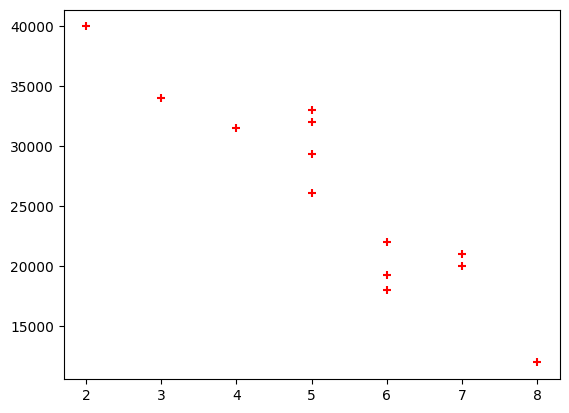

In [4]:
%matplotlib inline
plt.scatter(df['Age(yrs)'] , df['Sell Price($)'] , color='red' , marker='+')

In [8]:
dummies=pd.get_dummies(df['Car Model'])
dummies=dummies.astype(int)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [9]:
merge=pd.concat([df , dummies] , axis=1)
merge

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [ ]:
price=merge['Sell Price($)']
price

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [11]:
merge=merge.drop(['Car Model' , 'Sell Price($)'] , axis=1)
merge

,Mileage,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,6,0,1,0
1,35000,3,0,1,0
2,57000,5,0,1,0
3,22500,2,0,1,0
4,46000,4,0,1,0
5,59000,5,1,0,0
6,52000,5,1,0,0
7,72000,6,1,0,0
8,91000,8,1,0,0
9,67000,6,0,0,1


In [12]:
reg=LinearRegression()
reg.fit(merge , price)

LinearRegression()

In [13]:
reg.score(merge , price)

0.9417050937281083

In [15]:
reg.predict([[45000 , 4 , 0 , 0 , 1]])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [16]:
reg.predict([[86000 , 7 , 0 ,1 , 0]])

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])